# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_path = 'lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

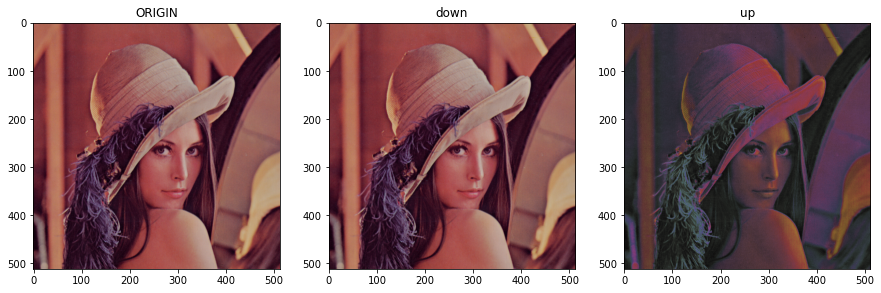

In [13]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[...,-1] = img_hsv_down[...,-1]/255 - change_percentage
img_hsv_down[img_hsv_down[...,-1] < 0] = 0
img_hsv_down[...,-1] = img_hsv_down[...,-1]*255
img_hsv_down = img_hsv_down.astype('uint8')
# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[...,-1] = img_hsv_up[...,-1]/255 + change_percentage
img_hsv_up[img_hsv_up[...,-1] < 0] = 0
img_hsv_up[...,-1] = img_hsv_up[...,-1]*255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv = cv2.cvtColor(img_hsv_down,cv2.COLOR_HSV2BGR)[:,:,::-1]
img_hsv_down = cv2.cvtColor(img_hsv_down,cv2.COLOR_HSV2BGR)[:,:,::-1]
img_hsv_up = cv2.cvtColor(img_hsv_down,cv2.COLOR_HSV2BGR)[:,:,::-1]

# 組合圖片 + 顯示圖片
#img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
#while True:
#    cv2.imshow('change saturation', img_hsv_change)
#    
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break
f,axs = plt.subplots(1,3)
f.set_figwidth(15)
f.set_figheight(5)
axs[0].imshow(img_hsv)
axs[0].set_title('ORIGIN')
axs[1].imshow(img_hsv_down)
axs[1].set_title('down')
axs[2].imshow(img_hsv_up)
axs[2].set_title('up')
plt.show()

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

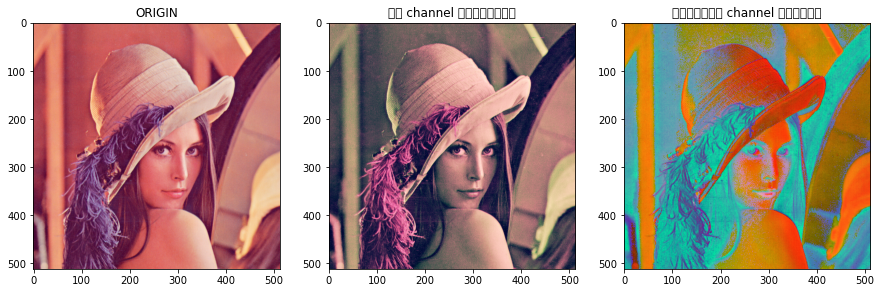

In [43]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = img.copy()
equalHist_by_channel[...,-1] = cv2.equalizeHist(equalHist_by_channel[...,-1])
equalHist_by_channel[...,-1] = cv2.equalizeHist(equalHist_by_channel[...,-2])
equalHist_by_channel[...,-1] = cv2.equalizeHist(equalHist_by_channel[...,-3])

# 組合經過直方圖均衡的每個 channel

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_hsv_equal[...,-1] = cv2.equalizeHist(img_hsv_equal[...,-1])

# 組合圖片 + 顯示圖片
#img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
#while True:
#    # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
#    cv2.imshow('bgr equal histogram', img_bgr_equalHist)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break
f,axs = plt.subplots(1,3)
f.set_figwidth(15)
f.set_figheight(5)
axs[0].imshow(img[:,:,::-1])
axs[0].set_title('ORIGIN')
axs[1].imshow(equalHist_by_channel[:,:,::-1])
axs[1].set_title('每個 channel 個別做直方圖均衡')
axs[2].imshow(img_hsv_equal[:,:,::-1])
axs[2].set_title('後只對其中一個 channel 做直方圖均衡')
plt.show()

## 調整對比 / 明亮

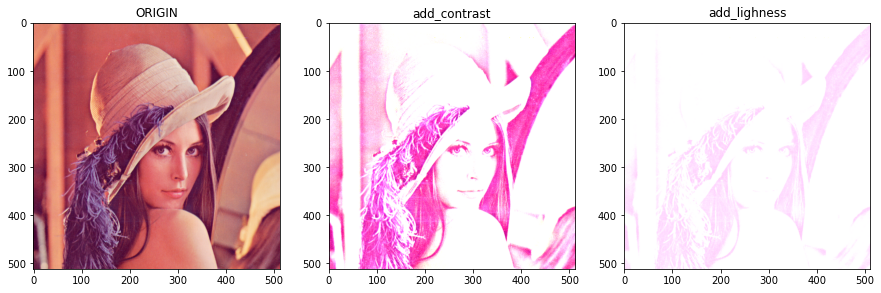

In [46]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha = 3. )
add_lighness = cv2.convertScaleAbs(img, beta = 150)

# 組合圖片 + 顯示圖片
#img_contrast_light = np.hstack((img, add_contrast, add_lighness))
#while True:
#    # 比較不同程度的對比 / 明亮
#    cv2.imshow('adjust contrast and brighness', img_contrast_light)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break
f,axs = plt.subplots(1,3)
f.set_figwidth(15)
f.set_figheight(5)
axs[0].imshow(img[:,:,::-1])
axs[0].set_title('ORIGIN')
axs[1].imshow(add_contrast[:,:,::-1])
axs[1].set_title('add_contrast')
axs[2].imshow(add_lighness[:,:,::-1])
axs[2].set_title('add_lighness')
plt.show()